# Analyzing Iris data set

The __Iris flower data set__ or __Fisher's Iris data set__ is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called __Anderson's Iris data set__ because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

## 1. Visualization

The first goal of this analysis is getting more familiarity with the data that is going to be used. For this purpose, the code is provided below.

In [1]:
library('ggplot2')

Warning message:
"package 'ggplot2' was built under R version 3.4.4"

In [8]:
data(iris)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


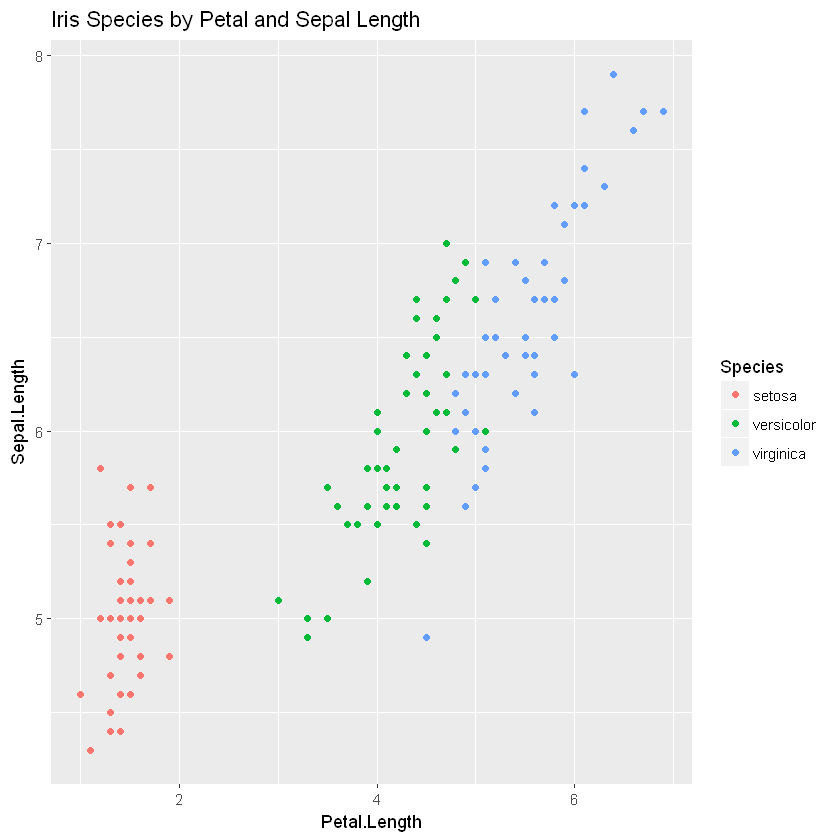

In [9]:
ggplot(iris, aes(x = Petal.Length, y = Sepal.Length, colour = Species)) + 
  geom_point() +
  ggtitle('Iris Species by Petal and Sepal Length')

The diagram above clearly shows differences between setosas and the other two species. Versicolors and virginicas appear different too, however, it would be difficult to classify which is which on the border.

## 2. Regression

Let’s see what regression can do to classify this data using only Petal.Length and Sepal.Length as our explanatory variables. I’ll first create a dummy variable for versicolors. Then we’ll fit our model, and assume any observation who’s predicted probability is greater than one-half is a versicolor. Finally, we’ll examine our type 1 and type 2 errors.

In [10]:
iris[['Is.Versicolor']] <- as.numeric(iris[['Species']] == 'versicolor')
fit.lm <- lm(Is.Versicolor ~ Petal.Length + Sepal.Length, data = iris)
summary(fit.lm)


Call:
lm(formula = Is.Versicolor ~ Petal.Length + Sepal.Length, data = iris)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6597 -0.3667 -0.1962  0.5520  0.7929 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.11893    0.40693   2.750 0.006715 ** 
Petal.Length  0.14794    0.04328   3.419 0.000815 ***
Sepal.Length -0.22959    0.09226  -2.489 0.013940 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4569 on 147 degrees of freedom
Multiple R-squared:  0.07949,	Adjusted R-squared:  0.06696 
F-statistic: 6.347 on 2 and 147 DF,  p-value: 0.002271


In [12]:
iris[['Predict.Versicolor.lm']] <- as.numeric(predict(fit.lm) > 0.5)

table(iris[, c('Is.Versicolor', 'Predict.Versicolor.lm')])

             Predict.Versicolor.lm
Is.Versicolor  0  1
            0 89 11
            1 47  3

It seems that all the variables were significant with p < 0.05, but the model has poor predictive power. The model could be refined further.

In [13]:
fit.logit <- glm(Is.Versicolor ~ Petal.Length + Sepal.Length, data = iris,
                 family = binomial(link = 'logit'))
summary(fit.logit)


Call:
glm(formula = Is.Versicolor ~ Petal.Length + Sepal.Length, family = binomial(link = "logit"), 
    data = iris)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5493  -0.9437  -0.6451   1.2645   1.7894  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)   
(Intercept)    3.0440     1.9752   1.541  0.12328   
Petal.Length   0.7369     0.2282   3.229  0.00124 **
Sepal.Length  -1.1262     0.4611  -2.443  0.01459 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 190.95  on 149  degrees of freedom
Residual deviance: 178.32  on 147  degrees of freedom
AIC: 184.32

Number of Fisher Scoring iterations: 4


In [14]:
iris[['Predict.Versicolor.logit']] <- as.numeric(predict(fit.logit) > 0.5)
table(iris[, c('Is.Versicolor', 'Predict.Versicolor.logit')])

             Predict.Versicolor.logit
Is.Versicolor  0  1
            0 99  1
            1 50  0

Both explanatory variables are significant with p < 0.05, however the intercept is not.

## 3. Post-examination

Significance isn’t everything. We’ve clearly shown that here. Let’s examine where we went wrong.

1. Both Petal.Length and Sepal.Length are highly correlated. We knew this from the graph. Multicollinearity isn’t normally an issue in linear models, but it certainly is when the correlation is this strong. Collinearity, however, is not actually where we went wrong.

2. We knew from the visualization that Petal.Length and Sepal.Length were important. We should not have stopped there. We should have examined other relationships which determine species and added them to our model. But, again, this is not where we went wrong.

3. Notice I chose to predict the classification of versicolors. Versicolor, as you can see in the visualization, is mapped right between both setosas and virginicas. Linear models work when you can draw a single, straight line through the data - a threshold. Clearly, one single, straight line cannot separate versicolors from non-versicolors in this model.

4. If we take this one step further, we find that our estimated coefficients for both Petal.Length and Sepal.Length are totally useless. I’ll leave that to you to figure out why.